### Import Necessary Libraries

In [100]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True) #color code visualizations
%matplotlib inline

### Import And Read Data

In [76]:
df = pd.read_csv('olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [77]:
#organize column names, remove first row
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.columns = ['Country','Summer Games', 'Gold', 'Silver', 'Bronze', 'Total Summer Medals', 'Winter Games', 'Gold', 'Silver', 'Bronze', 'Total Winter Medals', 'Total Games', 'Total Gold', 'Total Silver', 'Total Bronze', 'Total Medals']

In [36]:
df.head()

,Country,Summer Games,Gold,Silver,Bronze,Total Summer Medals,Winter Games,Gold,Silver,Bronze,Total Winter Medals,Total Games,Total Gold,Total Silver,Total Bronze,Total Medals
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [78]:
pd.isnull(df) #check for any missing values
pd.isnull(df).sum() #add up any null values, per column, should there be any

Country                0
Summer Games           0
Gold                   0
Silver                 0
Bronze                 0
Total Summer Medals    0
Winter Games           0
Gold                   0
Silver                 0
Bronze                 0
Total Winter Medals    0
Total Games            0
Total Gold             0
Total Silver           0
Total Bronze           0
Total Medals           0
dtype: int64

In [79]:
df.dtypes

Country                object
Summer Games           object
Gold                   object
Silver                 object
Bronze                 object
Total Summer Medals    object
Winter Games           object
Gold                   object
Silver                 object
Bronze                 object
Total Winter Medals    object
Total Games            object
Total Gold             object
Total Silver           object
Total Bronze           object
Total Medals           object
dtype: object

In [91]:
#change type of each column to int (vs object)
important_columns = list(df)
for column in important_columns[1:]:
    df[column] = df[column].astype(str).astype(int)
df.dtypes

Country                object
Summer Games            int64
Gold                    int64
Silver                  int64
Bronze                  int64
Total Summer Medals     int64
Winter Games            int64
Gold                    int64
Silver                  int64
Bronze                  int64
Total Winter Medals     int64
Total Games             int64
Total Gold              int64
Total Silver            int64
Total Bronze            int64
Total Medals            int64
dtype: object

In [138]:
#reorganize data so total number of medals is in decreasing order
df = df.sort_values(by='Total Medals',ascending=False)
df

,Country,Summer Games,Gold,Silver,Bronze,Total Summer Medals,Winter Games,Gold,Silver,Bronze,Total Winter Medals,Total Games,Total Gold,Total Silver,Total Bronze,Total Medals
147,Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579
136,United States (USA) [P] [Q] [R] [Z],26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681
107,Soviet Union (URS) [URS],9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204
50,Great Britain (GBR) [GBR] [Z],27,236,272,272,780,22,10,4,12,26,49,246,276,284,806
45,Germany (GER) [GER] [Z],15,174,182,217,573,11,78,78,53,209,26,252,260,270,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Botswana (BOT),9,0,1,0,1,0,0,0,0,0,9,0,1,0,1
110,Senegal (SEN),13,0,1,0,1,5,0,0,0,0,18,0,1,0,1
20,Burundi (BDI),5,1,0,0,1,0,0,0,0,0,5,1,0,0,1
141,Virgin Islands (ISV),11,0,1,0,1,7,0,0,0,0,18,0,1,0,1


### Data Visualization

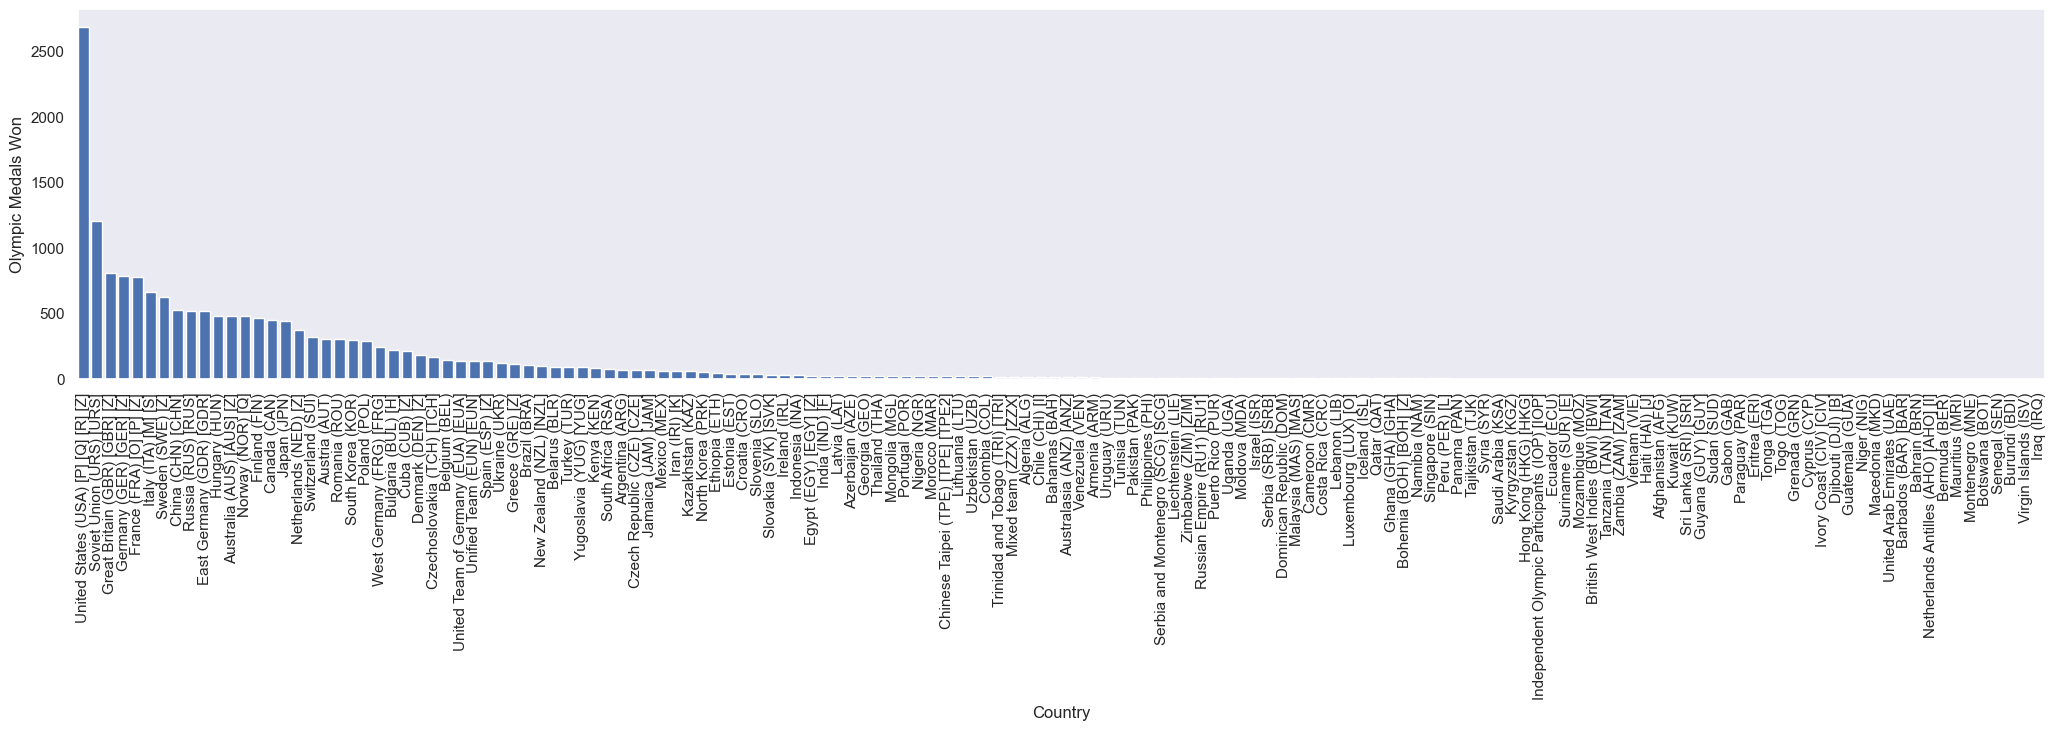

In [139]:
plt.bar(df['Country'].iloc[1:],df['Total Medals'].iloc[1:])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Olympic Medals Won')

#organize data so tickers on x and y axes are well spread out
N = 147
data = np.linspace(0, N, N)

plt.xticks(range(N))
plt.grid()

#plt.plot(data) (for a general trend line, irrelevant here due to organization of df)

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


plt.show()